<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>
*Copyright by Pierian Data Inc.*

# Contour Detection

## External vs Internal Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../DATA/internal_external.png',0)

In [3]:
img.shape

(652, 1080)

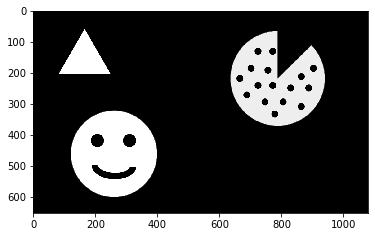

In [4]:
plt.imshow(img,cmap='gray')

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [10]:
print(help(cv2.findContours))
#image, contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# Borro image
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
    .   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
    .   @p

In [11]:
type(contours)

list

In [12]:
#Los dibujos que hay en la imagen
len(contours)

22

In [13]:
type(hierarchy)

numpy.ndarray

In [34]:
hierarchy.shape

(1, 22, 4)

In [35]:
# El ultimo dato dice si es externo o interno
hierarchy
# -1 es contorno externo,
# 0 son las imagenes dentro del contorno 0
# 4 son las imagenes dentro del contorno 4

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [14]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

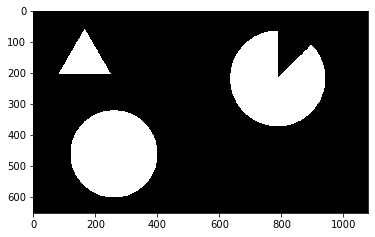

In [19]:
plt.imshow(external_contours,cmap='gray')

In [29]:
print(len(contours[20]))
print(contours[20])

28
[[[721 122]]

 [[722 121]]

 [[728 121]]

 [[729 122]]

 [[730 122]]

 [[735 127]]

 [[735 128]]

 [[736 129]]

 [[736 135]]

 [[735 136]]

 [[735 137]]

 [[730 142]]

 [[729 142]]

 [[728 143]]

 [[722 143]]

 [[721 142]]

 [[720 142]]

 [[715 137]]

 [[715 136]]

 [[714 135]]

 [[714 129]]

 [[715 128]]

 [[715 127]]

 [[717 125]]

 [[717 124]]

 [[718 123]]

 [[719 123]]

 [[720 122]]]


In [32]:
# Create empty array to hold internal contours
image_internal = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal,
    # Todos los que tocan el fondo
    if hierarchy[0][i][3] == -1:
        
        # Draw the Contour
        # Con el i le decimos el indice del contorno, el contorno son todas las imagenes que hay en la imagen (puntitos, sonrisa, triangulo, etc)
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

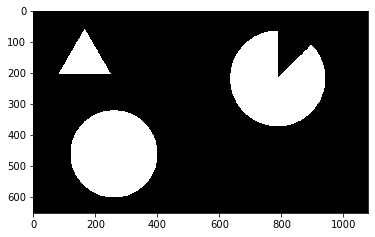

In [33]:
plt.imshow(image_internal,cmap='gray')